# Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import time, datetime, itertools, pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from itertools import permutations

# Read and Visualize results

## 1. Linear kernel

In [23]:
results_df = pd.read_excel("/content/MNIST_linear.xlsx")
results_df.drop("Unnamed: 0", axis=1, inplace=True)

In [24]:
results_df

,dataset,model,kernel,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
0,MNIST,SVM,linear,0.0001,irrelevant,35999,24000,9999,87,YES,NO,0h 7min 53sec,11.13,11.40
1,MNIST,SVM,linear,0.0010,irrelevant,35999,24000,9999,87,YES,NO,0h 7min 55sec,36.73,37.07
2,MNIST,SVM,linear,0.0100,irrelevant,35999,24000,9999,87,YES,NO,0h 4min 9sec,89.47,89.56
3,MNIST,SVM,linear,0.1000,irrelevant,35999,24000,9999,87,YES,NO,0h 1min 36sec,92.72,92.58
4,MNIST,SVM,linear,1.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 49sec,94.16,93.81
5,MNIST,SVM,linear,10.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 40sec,94.77,93.97
6,MNIST,SVM,linear,100.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 1min 7sec,95.05,93.88
7,MNIST,SVM,linear,1000.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 4min 47sec,95.26,93.73
8,MNIST,SVM,linear,10000.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 36min 5sec,95.29,93.64
9,MNIST,SVM,linear,100000.0000,irrelevant,35999,24000,9999,87,YES,NO,4h 7min 8sec,95.04,93.55


In [25]:
results_df[results_df['Validation accuracy (%)'] == results_df['Validation accuracy (%)'].max()]

,dataset,model,kernel,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
5,MNIST,SVM,linear,10.0,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 40sec,94.77,93.97


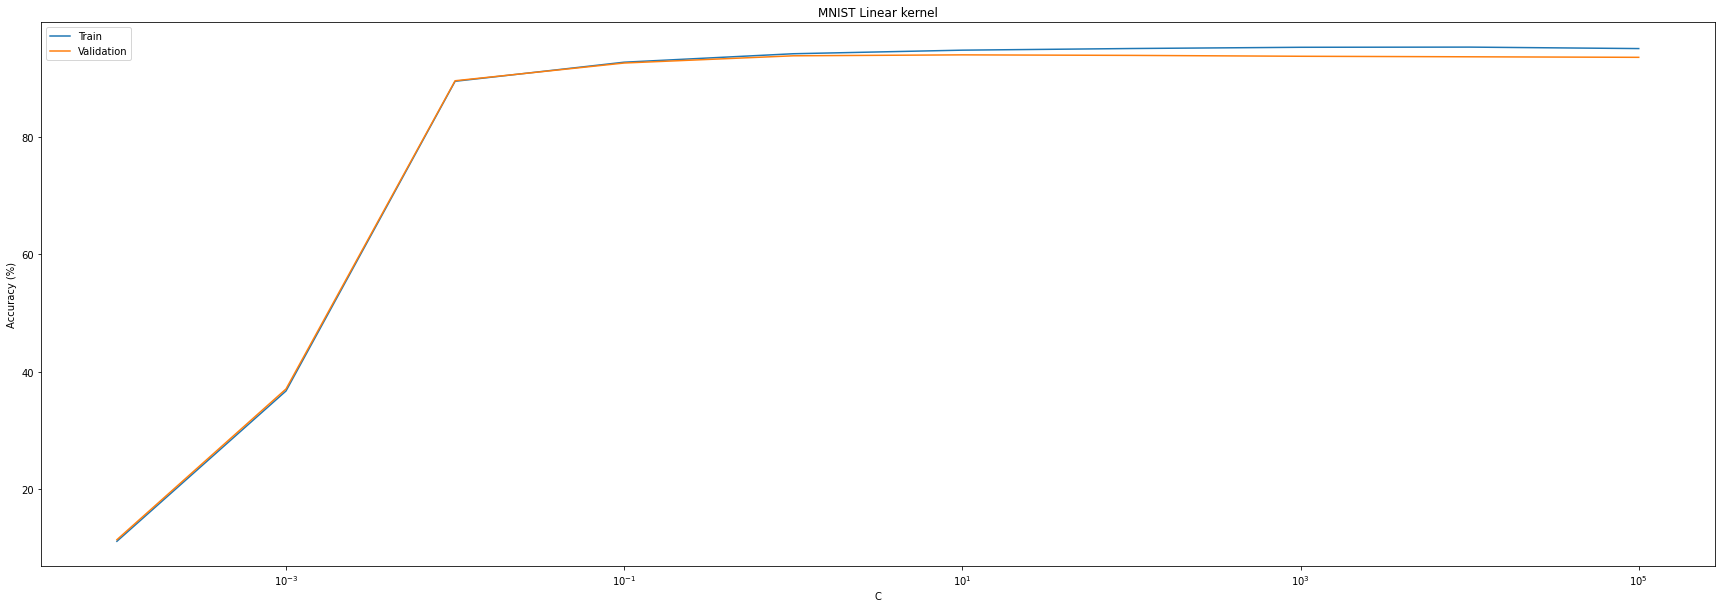

In [3]:
plt.figure(figsize=(30, 10))
plt.plot(results_df['C'].values, results_df['Train accuracy (%)'].values, label='Train')
plt.plot(results_df['C'].values, results_df['Validation accuracy (%)'].values, label='Validation')
plt.xlabel('C')
plt.ylabel('Accuracy (%)')
plt.title("MNIST Linear kernel")
plt.xscale('log')
plt.legend()
plt.show()

## 2. RBF kernel

In [26]:
results_df = pd.read_excel(f"/content/MNIST_rbf.xlsx")
results_df.reset_index(inplace=True)
results_df.drop('index', axis=1, inplace=True)

In [29]:
results_df[50:]

,Unnamed: 0,dataset,model,kernel,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
50,50,MNIST,SVM,rbf,10.0,0.0001,35999,24000,9999,87,YES,NO,0h 11min 1sec,76.88,76.64
51,51,MNIST,SVM,rbf,10.0,0.0010,35999,24000,9999,87,YES,NO,0h 6min 7sec,90.76,90.73
52,52,MNIST,SVM,rbf,10.0,0.0100,35999,24000,9999,87,YES,NO,0h 2min 48sec,93.49,93.15
53,53,MNIST,SVM,rbf,10.0,0.1000,35999,24000,9999,87,YES,NO,0h 1min 34sec,97.71,96.28
54,54,MNIST,SVM,rbf,10.0,1.0000,35999,24000,9999,87,YES,NO,0h 2min 48sec,100.00,98.08
55,55,MNIST,SVM,rbf,10.0,10.0000,35999,24000,9999,87,YES,NO,0h 11min 11sec,100.00,43.17
56,56,MNIST,SVM,rbf,10.0,100.0000,35999,24000,9999,87,YES,NO,0h 13min 9sec,100.00,11.27
57,57,MNIST,SVM,rbf,10.0,1000.0000,35999,24000,9999,87,YES,NO,0h 13min 17sec,100.00,11.27
58,58,MNIST,SVM,rbf,10.0,10000.0000,35999,24000,9999,87,YES,NO,0h 12min 53sec,100.00,11.27
59,59,MNIST,SVM,rbf,10.0,100000.0000,35999,24000,9999,87,YES,NO,0h 13min 4sec,100.00,11.27


In [27]:
results_df[results_df['Validation accuracy (%)'] == results_df['Validation accuracy (%)'].max()]

,Unnamed: 0,dataset,model,kernel,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
54,54,MNIST,SVM,rbf,10.0,1.0,35999,24000,9999,87,YES,NO,0h 2min 48sec,100.0,98.08
64,64,MNIST,SVM,rbf,100.0,1.0,35999,24000,9999,87,YES,NO,0h 2min 42sec,100.0,98.08
74,74,MNIST,SVM,rbf,1000.0,1.0,35999,24000,9999,87,YES,NO,0h 2min 39sec,100.0,98.08
84,84,MNIST,SVM,rbf,10000.0,1.0,35999,24000,9999,87,YES,NO,0h 2min 49sec,100.0,98.08
94,94,MNIST,SVM,rbf,100000.0,1.0,35999,24000,9999,87,YES,NO,0h 2min 34sec,100.0,98.08


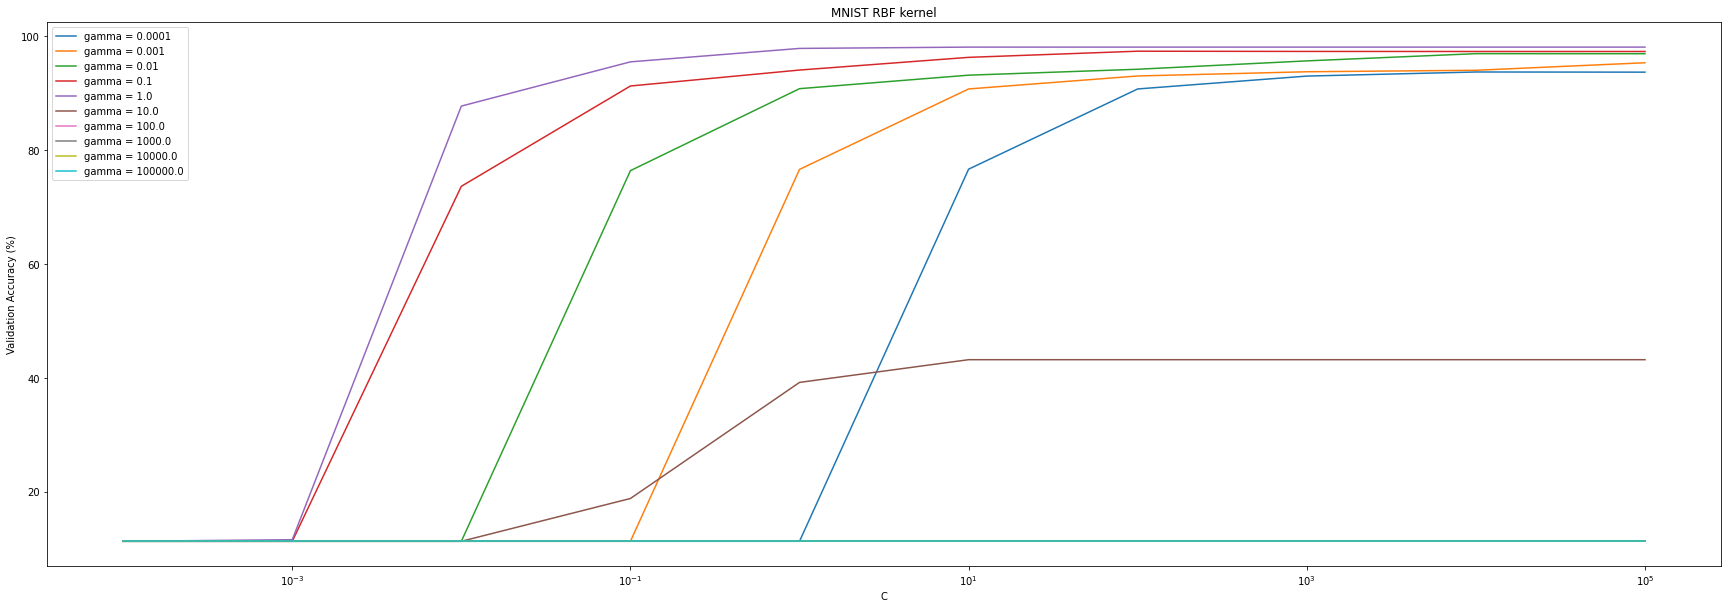

In [7]:
plt.figure(figsize=(30, 10))
for j, gamma in enumerate(np.unique(results_df['gamma'])):
  gamma_df = results_df[results_df['gamma'] == gamma]
  C_list = gamma_df['C'].values
  val_accuracy_list = gamma_df['Validation accuracy (%)'].values
  plt.plot(C_list, val_accuracy_list, label=f'gamma = {gamma}')

plt.xlabel('C')
plt.ylabel('Validation Accuracy (%)')
plt.title(f"MNIST RBF kernel")
plt.xscale('log')
plt.legend()
plt.show()

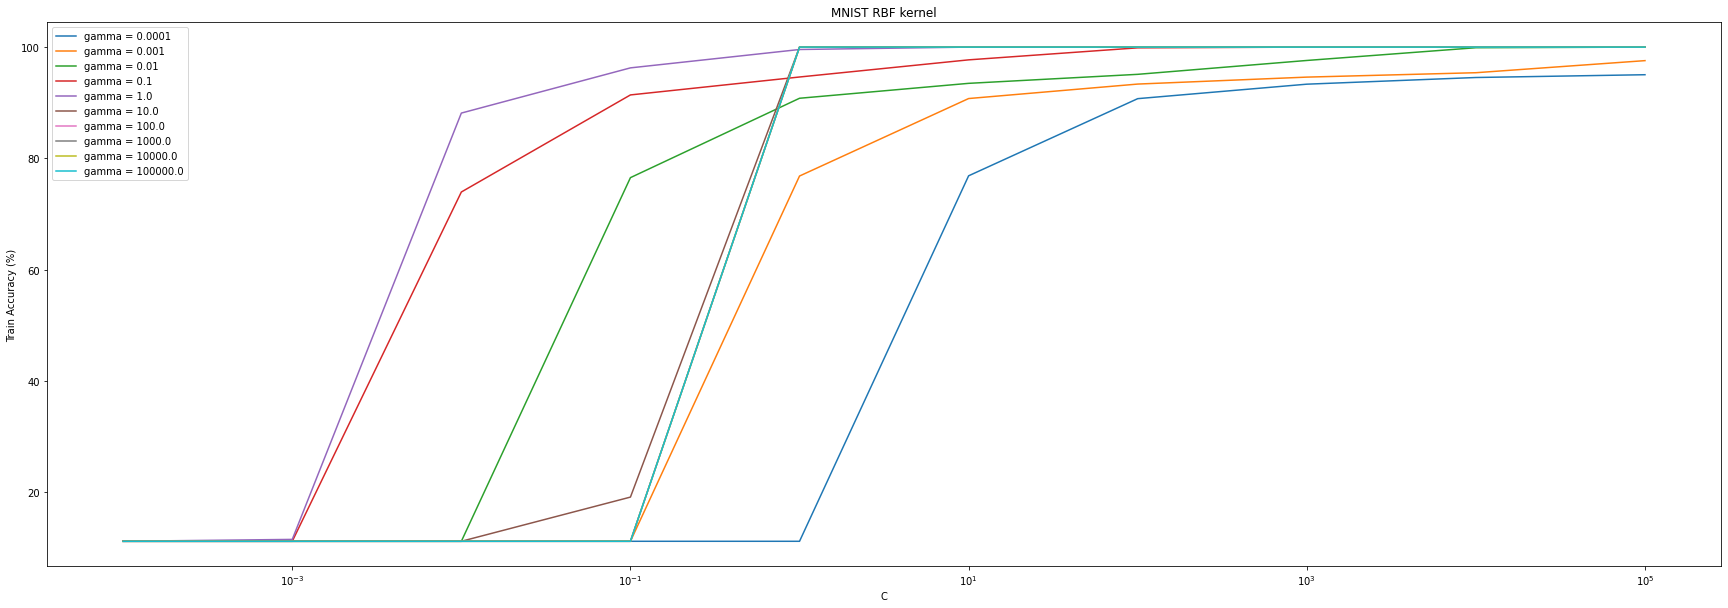

In [8]:
plt.figure(figsize=(30, 10))
for j, gamma in enumerate(np.unique(results_df['gamma'])):
  gamma_df = results_df[results_df['gamma'] == gamma]
  C_list = gamma_df['C'].values
  train_accuracy_list = gamma_df['Train accuracy (%)'].values
  plt.plot(C_list, train_accuracy_list, label=f'gamma = {gamma}')

plt.xlabel('C')
plt.ylabel('Train Accuracy (%)')
plt.title(f"MNIST RBF kernel")
plt.xscale('log')
plt.legend()
plt.show()

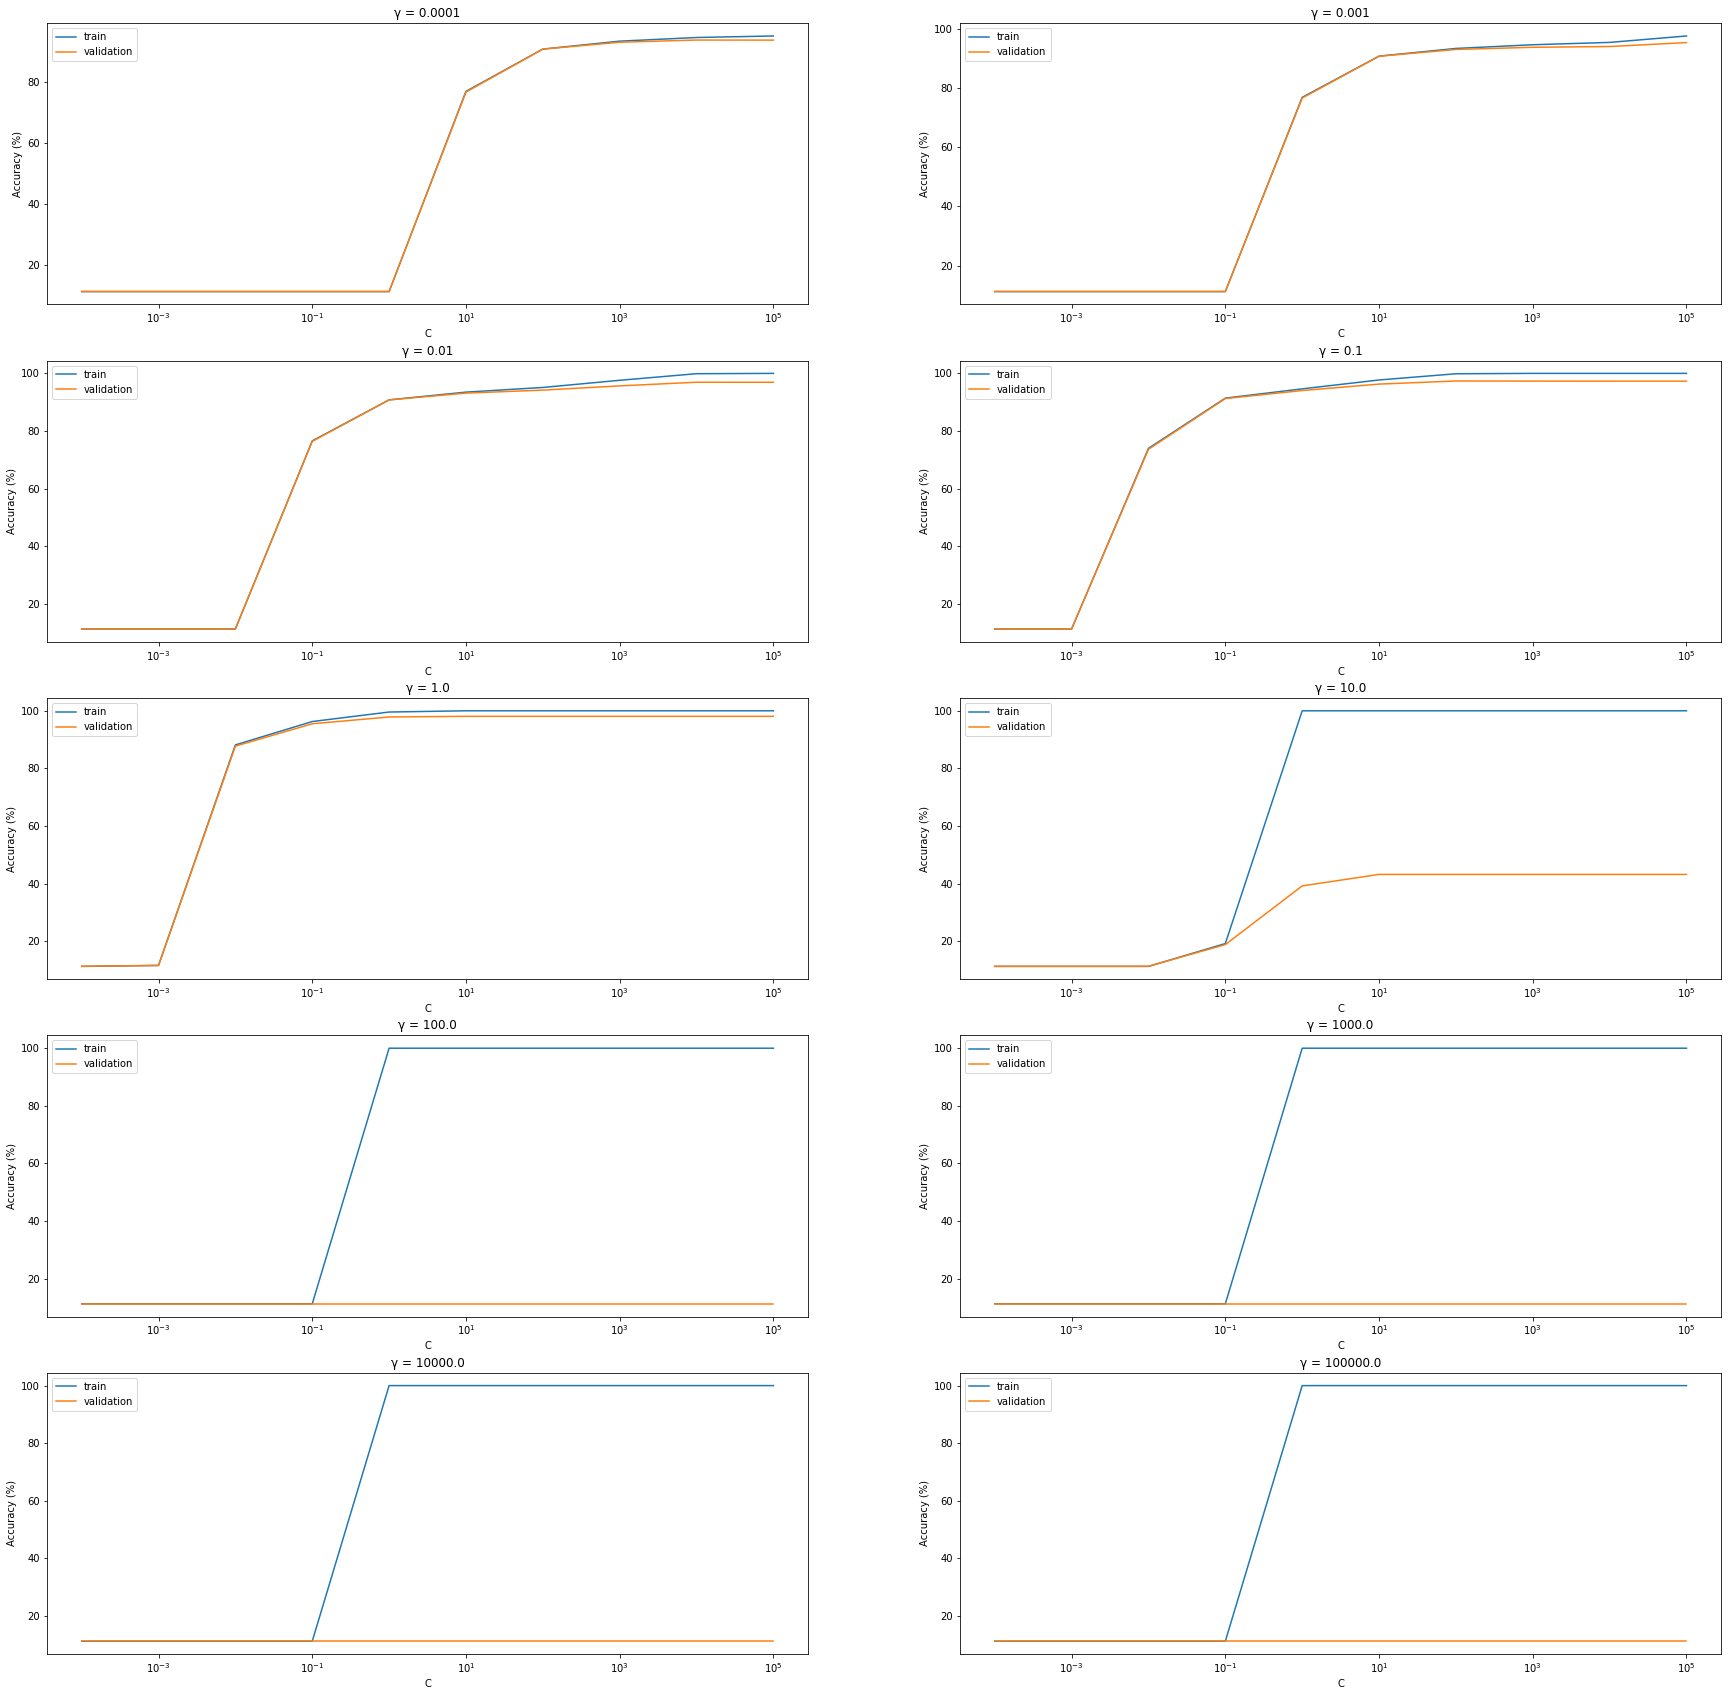

In [9]:
fig, axs = plt.subplots(5, 2, figsize=(30, 30))
# fig.suptitle('CIFAR-10 RBF kernel')
for j, gamma in enumerate(np.unique(results_df['gamma'])):
  gamma_df = results_df[results_df['gamma'] == gamma]
  C_list = gamma_df['C'].values 
  train_accuracy_list = gamma_df['Train accuracy (%)'].values
  val_accuracy_list = gamma_df['Validation accuracy (%)'].values
  axs[j//2, j%2].plot(C_list, train_accuracy_list, label='train')
  axs[j//2, j%2].plot(C_list, val_accuracy_list, label='validation')
  axs[j//2, j%2].set_xscale('log')
  axs[j//2, j%2].set_xlabel("C")
  axs[j//2, j%2].set_ylabel("Accuracy (%)")
  axs[j//2, j%2].set_title(f"γ = {gamma}")
  axs[j//2, j%2].legend()

## 3. Polynomial kernel

In [30]:
results_df = pd.read_excel("/content/MNIST_poly.xlsx")
results_df.drop("Unnamed: 0", axis=1, inplace=True)

In [31]:
results_df

,dataset,model,kernel,degree,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
0,MNIST,SVM,poly,2,0.0001,irrelevant,35999,24000,9999,87,YES,NO,0h 4min 2sec,84.61,84.40
1,MNIST,SVM,poly,2,0.0010,irrelevant,35999,24000,9999,87,YES,NO,0h 1min 42sec,91.63,91.32
2,MNIST,SVM,poly,2,0.0100,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 47sec,94.07,93.57
3,MNIST,SVM,poly,2,0.1000,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 29sec,96.21,94.97
4,MNIST,SVM,poly,2,1.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 30sec,99.31,96.82
5,MNIST,SVM,poly,2,10.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 33sec,99.99,96.99
6,MNIST,SVM,poly,2,100.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 33sec,100.00,96.98
7,MNIST,SVM,poly,2,1000.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 33sec,100.00,96.98
8,MNIST,SVM,poly,2,10000.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 33sec,100.00,96.98
9,MNIST,SVM,poly,2,100000.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 33sec,100.00,96.98


In [12]:
results_df[results_df['Validation accuracy (%)'] == results_df['Validation accuracy (%)'].max()]

,dataset,model,kernel,degree,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
21,MNIST,SVM,poly,4,0.001,irrelevant,35999,24000,9999,87,YES,NO,0h 0min 28sec,99.76,97.23


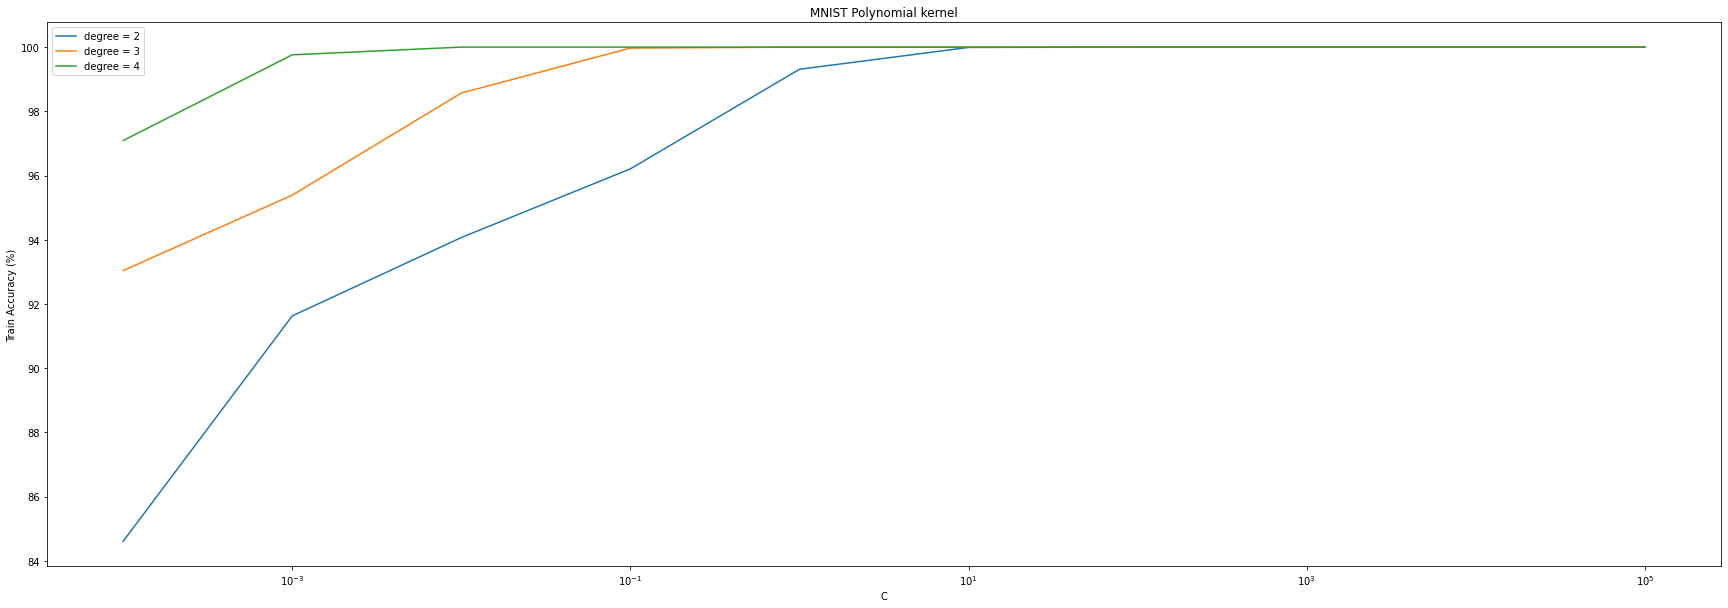

In [13]:
plt.figure(figsize=(30, 10))
for degree in np.unique(results_df['degree']):
  degree_df = results_df[results_df['degree'] == degree]
  C_list = degree_df['C'].values
  val_accuracy_list = degree_df['Train accuracy (%)'].values
  plt.plot(C_list, val_accuracy_list, label=f'degree = {degree}')

plt.xlabel('C')
plt.ylabel('Train Accuracy (%)')
plt.title("MNIST Polynomial kernel")
plt.xscale('log')
plt.legend()
plt.show()

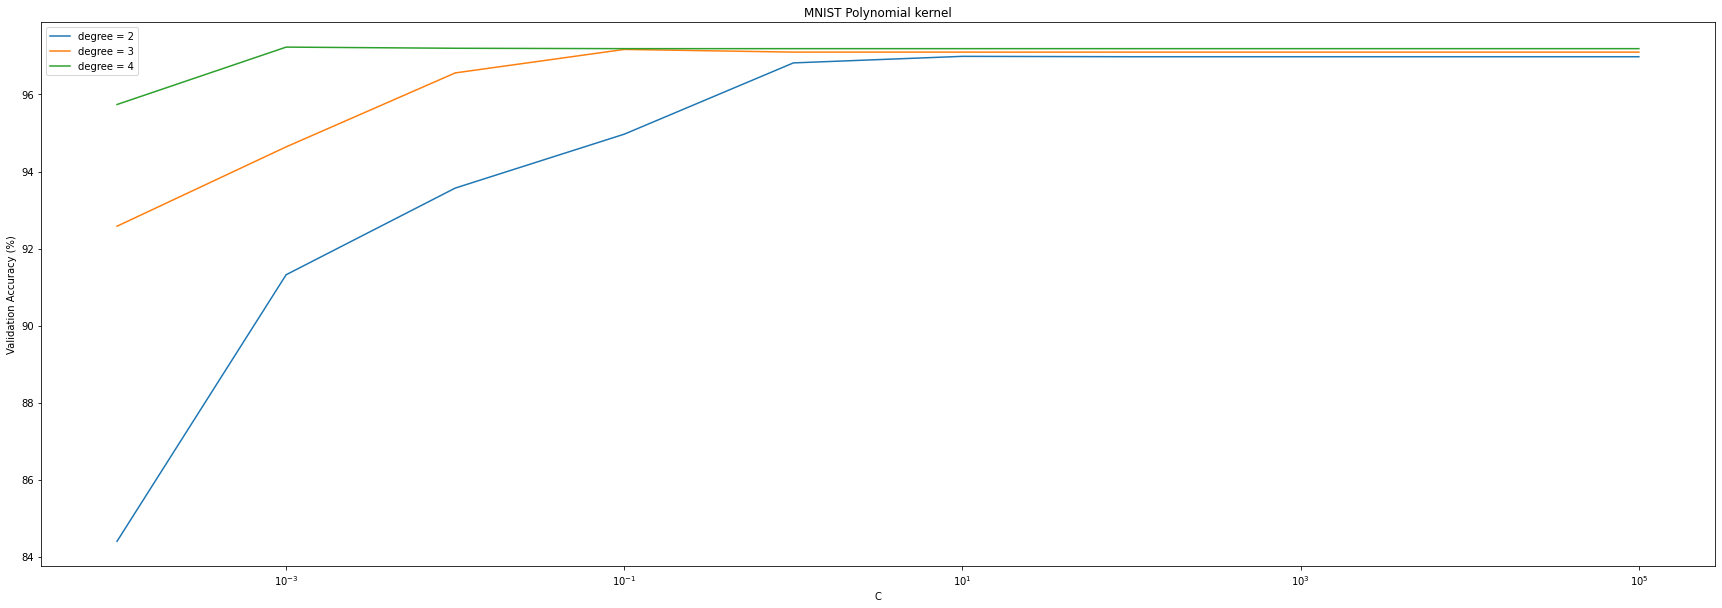

In [14]:
plt.figure(figsize=(30, 10))
for degree in np.unique(results_df['degree']):
  degree_df = results_df[results_df['degree'] == degree]
  C_list = degree_df['C'].values
  val_accuracy_list = degree_df['Validation accuracy (%)'].values
  plt.plot(C_list, val_accuracy_list, label=f'degree = {degree}')

plt.xlabel('C')
plt.ylabel('Validation Accuracy (%)')
plt.title("MNIST Polynomial kernel")
plt.xscale('log')
plt.legend()
plt.show()

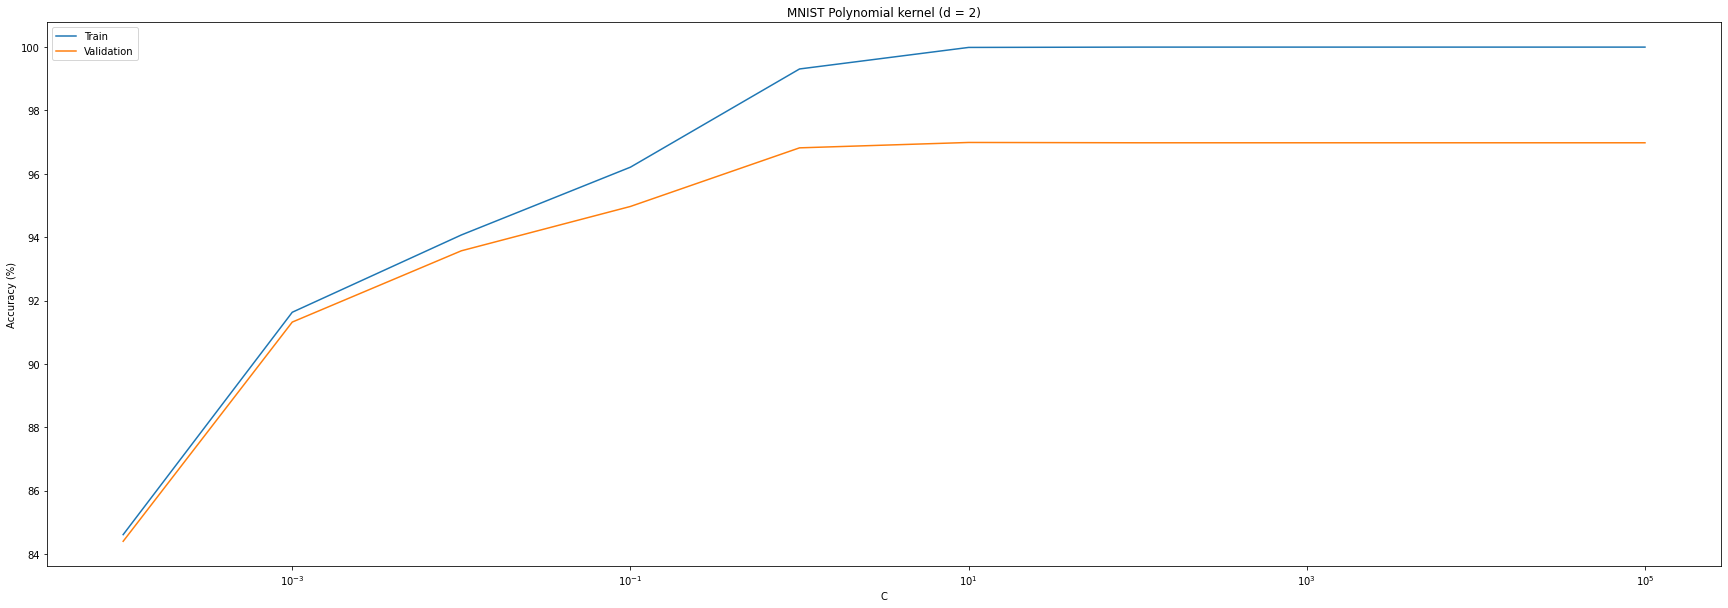

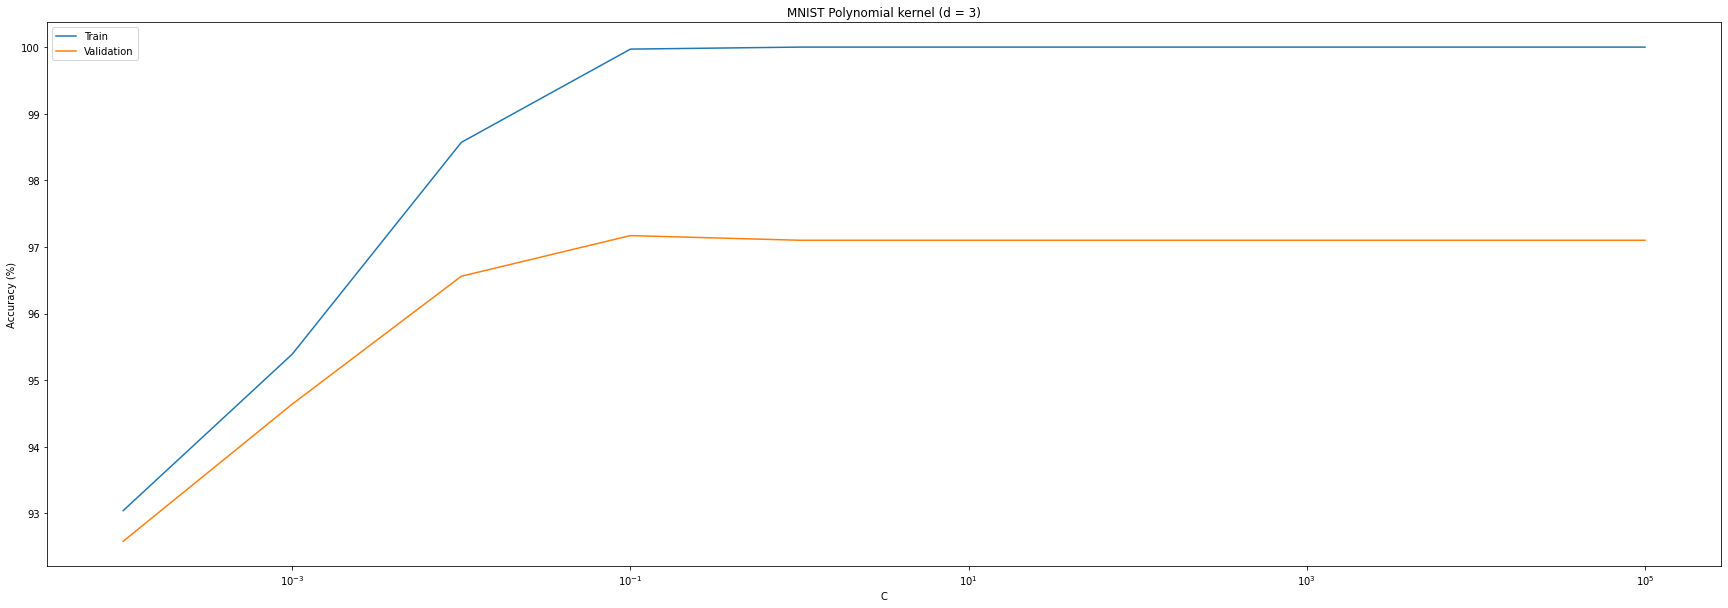

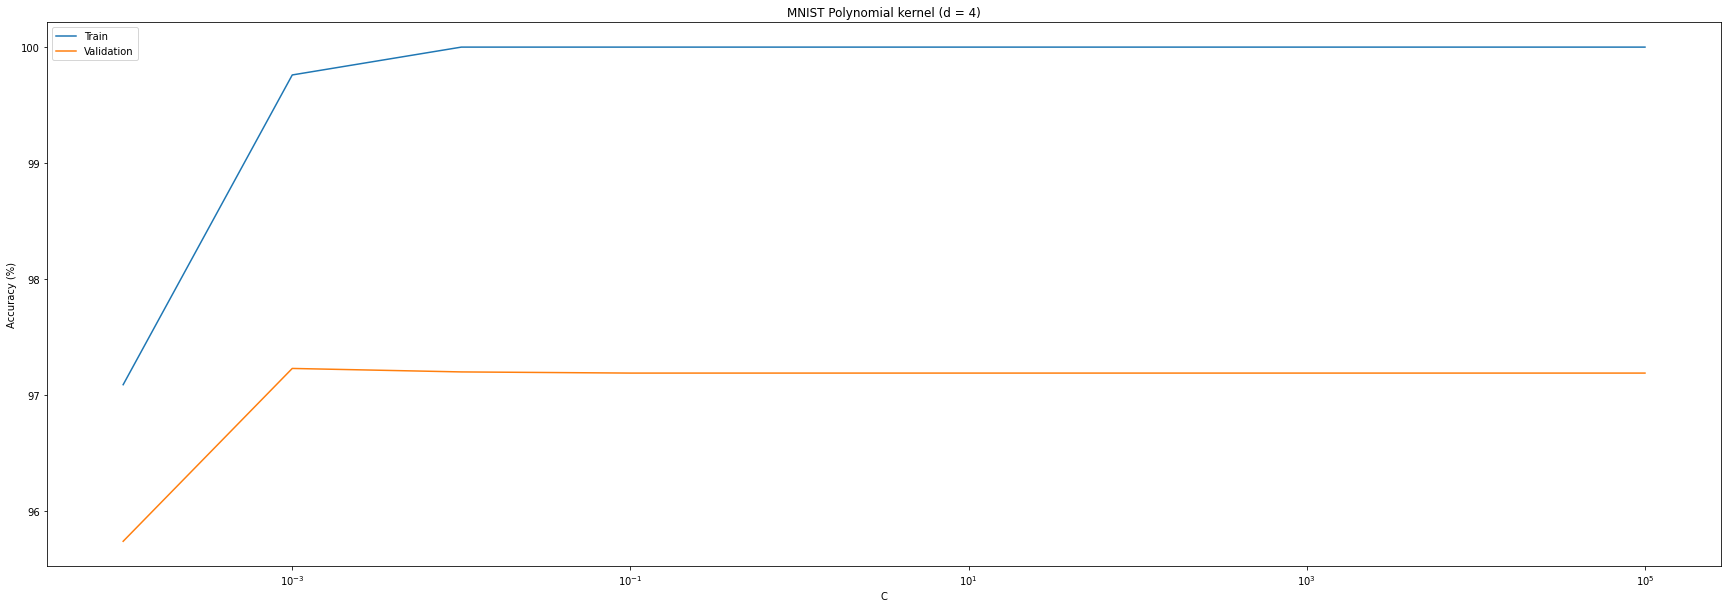

In [15]:
for degree in np.unique(results_df['degree']):
  plt.figure(figsize=(30, 10))
  degree_df = results_df[results_df['degree'] == degree]
  C_list = degree_df['C'].values
  val_accuracy_list = degree_df['Validation accuracy (%)'].values
  train_accuracy_list = degree_df['Train accuracy (%)'].values
  plt.plot(C_list, train_accuracy_list, label='Train')
  plt.plot(C_list, val_accuracy_list, label='Validation')
  plt.xlabel('C')
  plt.ylabel('Accuracy (%)')
  plt.title(f"MNIST Polynomial kernel (d = {degree})")
  plt.xscale('log')
  plt.legend()
  plt.show()

## 4. Sigmoid kernel

In [32]:
results_df = pd.read_excel("/content/MNIST_sigmoid.xlsx")
results_df.drop("Unnamed: 0", axis=1, inplace=True)

In [33]:
results_df

,dataset,model,kernel,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
0,MNIST,SVM,sigmoid,0.0001,irrelevant,35999,24000,9999,87,YES,NO,0h 12min 19sec,11,11.59
1,MNIST,SVM,sigmoid,0.0010,irrelevant,35999,24000,9999,87,YES,NO,0h 11min 45sec,11,11.59
2,MNIST,SVM,sigmoid,0.0100,irrelevant,35999,24000,9999,87,YES,NO,0h 10min 59sec,11,11.59
3,MNIST,SVM,sigmoid,0.1000,irrelevant,35999,24000,9999,87,YES,NO,0h 10min 55sec,11,11.59
4,MNIST,SVM,sigmoid,1.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 10min 44sec,11,11.59
5,MNIST,SVM,sigmoid,10.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 10min 51sec,11,11.59
6,MNIST,SVM,sigmoid,100.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 10min 57sec,11,11.59
7,MNIST,SVM,sigmoid,1000.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 10min 35sec,11,11.59
8,MNIST,SVM,sigmoid,10000.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 10min 49sec,11,11.59
9,MNIST,SVM,sigmoid,100000.0000,irrelevant,35999,24000,9999,87,YES,NO,0h 10min 45sec,11,11.59


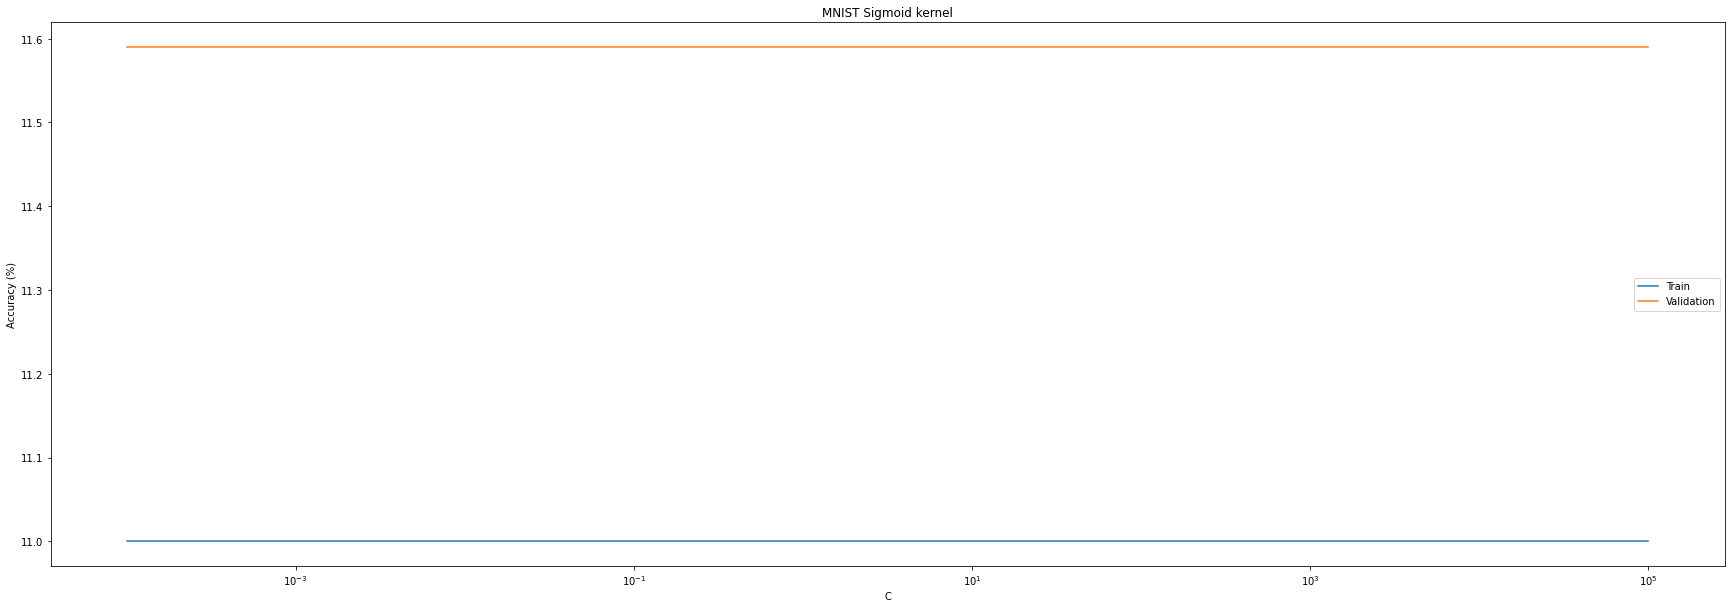

In [18]:
plt.figure(figsize=(30, 10))
plt.plot(results_df['C'].values, results_df['Train accuracy (%)'].values, label='Train')
plt.plot(results_df['C'].values, results_df['Validation accuracy (%)'].values, label='Validation')
plt.xlabel('C')
plt.ylabel('Accuracy (%)')
plt.title("MNIST Sigmoid kernel")
plt.xscale('log')
plt.legend()
plt.show()

## 5. KNN

In [34]:
results_df = pd.read_excel("/content/MNIST_KNN.xlsx")
results_df.drop("Unnamed: 0", axis=1, inplace=True)

In [38]:
results_df[50:]

,dataset,model,K,weights,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
50,MNIST,KNN,1,distance,35999,24000,9999,87,YES,NO,0h 0min 27sec,100.0,95.62
51,MNIST,KNN,2,distance,35999,24000,9999,87,YES,NO,0h 0min 31sec,100.0,95.62
52,MNIST,KNN,3,distance,35999,24000,9999,87,YES,NO,0h 0min 35sec,100.0,95.91
53,MNIST,KNN,4,distance,35999,24000,9999,87,YES,NO,0h 0min 47sec,100.0,96.07
54,MNIST,KNN,5,distance,35999,24000,9999,87,YES,NO,0h 0min 46sec,100.0,95.75
55,MNIST,KNN,6,distance,35999,24000,9999,87,YES,NO,0h 0min 46sec,100.0,95.84
56,MNIST,KNN,7,distance,35999,24000,9999,87,YES,NO,0h 0min 47sec,100.0,95.49
57,MNIST,KNN,8,distance,35999,24000,9999,87,YES,NO,0h 0min 46sec,100.0,95.58
58,MNIST,KNN,9,distance,35999,24000,9999,87,YES,NO,0h 0min 46sec,100.0,95.25
59,MNIST,KNN,10,distance,35999,24000,9999,87,YES,NO,0h 0min 47sec,100.0,95.26


In [35]:
df = results_df[(results_df['weights'] == 'uniform') & (results_df['K'] >= 10)]
df[df['Validation accuracy (%)'] == df['Validation accuracy (%)'].max()]

,dataset,model,K,weights,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
9,MNIST,KNN,10,uniform,35999,24000,9999,87,YES,NO,0h 0min 47sec,95.55,94.74


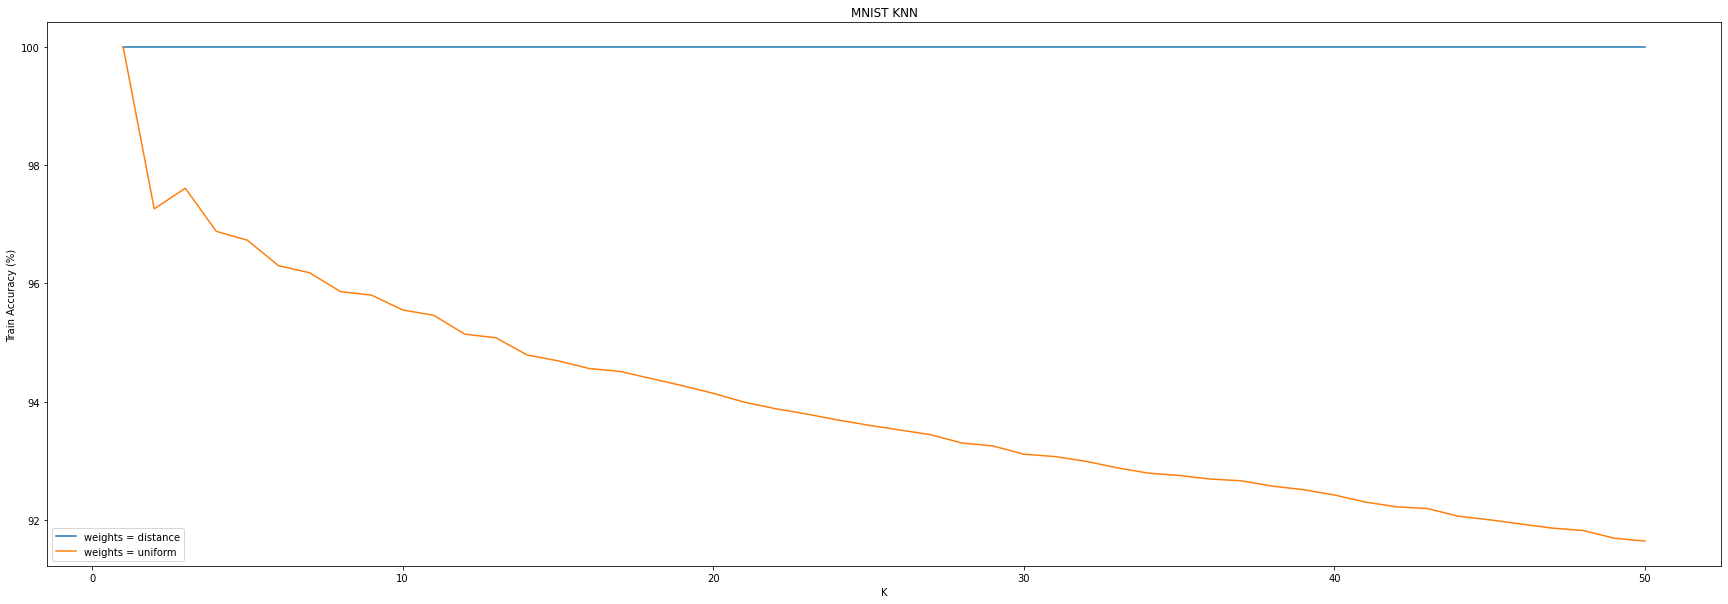

In [20]:
plt.figure(figsize=(30, 10))
for weight in np.unique(results_df['weights']):
  weight_df = results_df[results_df['weights'] == weight]
  K_list = weight_df['K'].values
  train_accuracy_list = weight_df['Train accuracy (%)'].values
  plt.plot(K_list, train_accuracy_list, label=f'weights = {weight}')

plt.xlabel('K')
plt.ylabel('Train Accuracy (%)')
plt.title("MNIST KNN")
plt.legend()
plt.show()

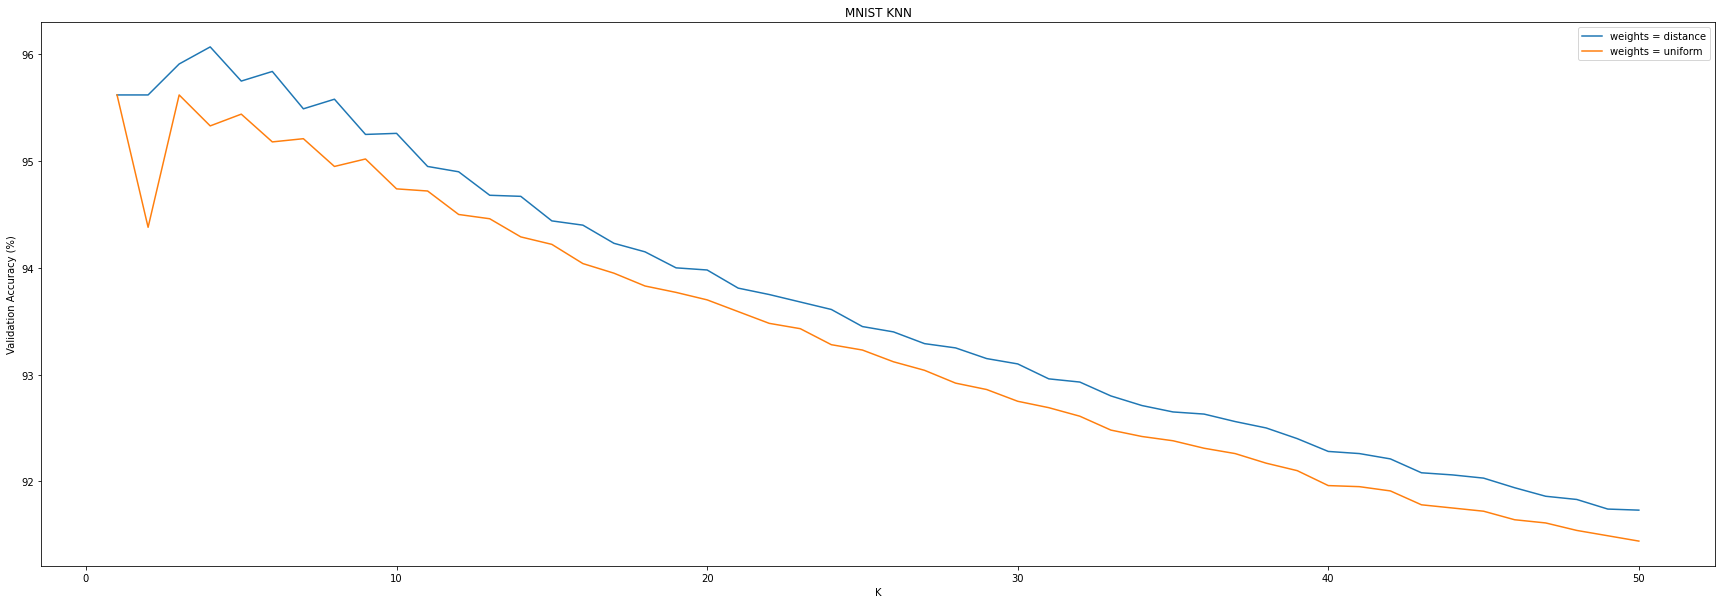

In [21]:
plt.figure(figsize=(30, 10))
for weight in np.unique(results_df['weights']):
  weight_df = results_df[results_df['weights'] == weight]
  K_list = weight_df['K'].values
  val_accuracy_list = weight_df['Validation accuracy (%)'].values
  plt.plot(K_list, val_accuracy_list, label=f'weights = {weight}')

plt.xlabel('K')
plt.ylabel('Validation Accuracy (%)')
plt.title("MNIST KNN")
plt.legend()
plt.show()

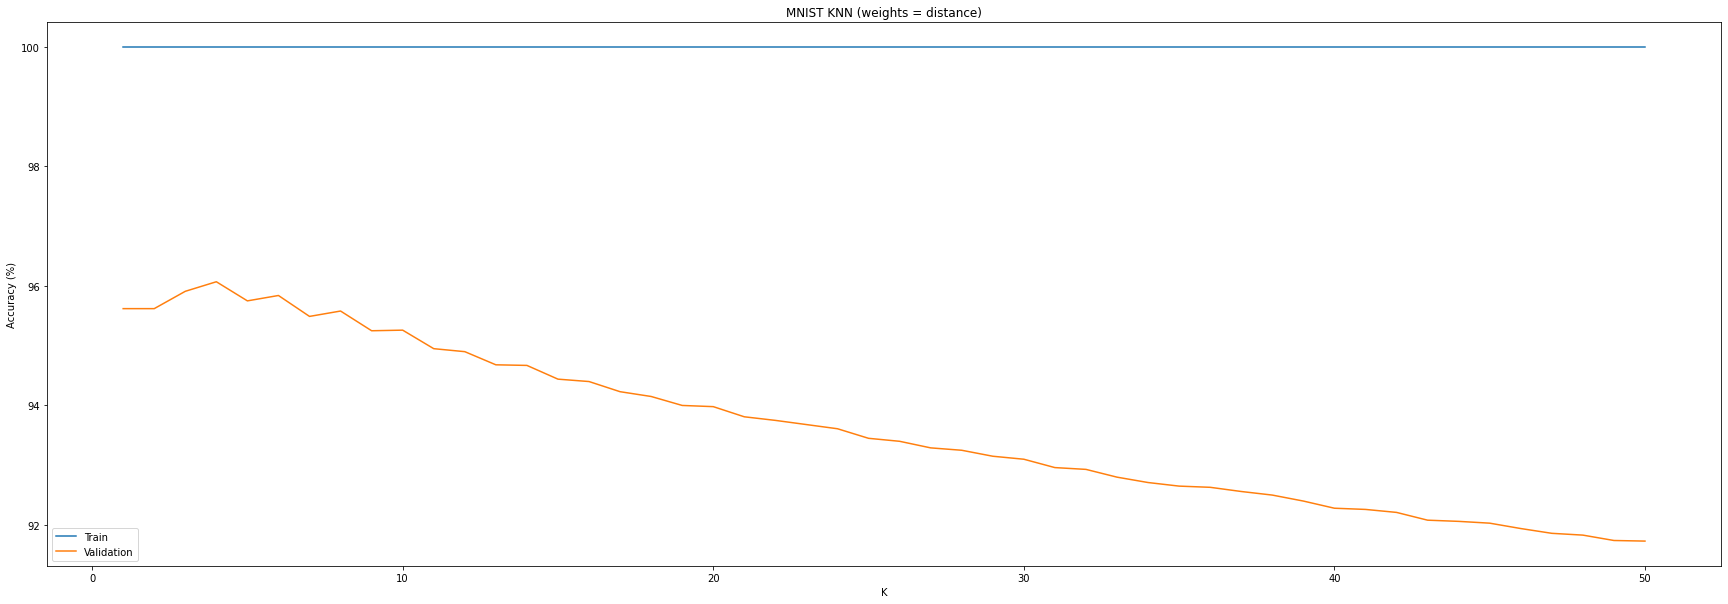

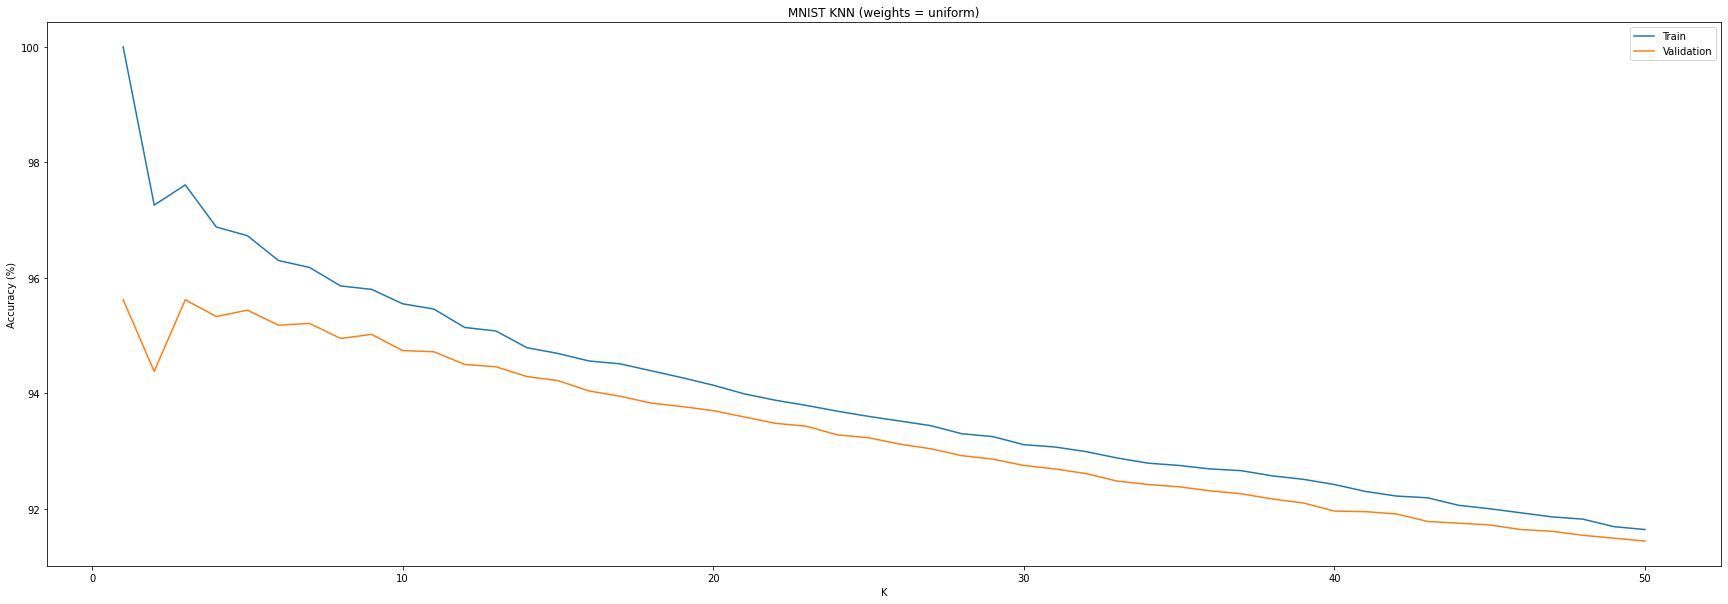

In [22]:
for weight in np.unique(results_df['weights']):
  plt.figure(figsize=(30, 10))
  weight_df = results_df[results_df['weights'] == weight]
  K_list = weight_df['K'].values
  val_accuracy_list = weight_df['Validation accuracy (%)'].values
  train_accuracy_list = weight_df['Train accuracy (%)'].values
  plt.plot(K_list, train_accuracy_list, label='Train')
  plt.plot(K_list, val_accuracy_list, label='Validation')
  plt.xlabel('K')
  plt.ylabel('Accuracy (%)')
  plt.title(f"MNIST KNN (weights = {weight})")
  # plt.xscale('log')
  plt.legend()
  plt.show()